### Analytical Calculation of Output Distribution (2Dimensions case)

#### By Irene Virdis

Given the exponential random distributions $f_X (x)$and $f_Y(y)$, we want to calculate the output distribution $f_Z (z)$ through the selected function $Z=g(X,Y)$ of the random variables X and Y.

\begin{equation}\label{eq:input}
f_X (x)  = \lambda_1 \cdot e^{(-\lambda_1 \cdot x) }, x\ge0, \lambda_1=2 ;\\
f_Y (y)  = \lambda_2 \cdot e^{(-\lambda_2 \cdot x) }, y\ge0, \lambda_2=0.5 ;\\
Z = g(X,Y) = a \cdot X + b\cdot Y \\
a=3, b= 5
\end{equation}

The input variables are supposed to be independent, so we can calculate the joint Probability Density function for the related distributions as follows:

$f_{XY}(xy) = f_X(x)f_Y(y)$

$f_{XY}(xy) = \lambda_1 e^{-\lambda_1 x} \lambda_2 e^{-\lambda_2 y}$

The Cumulative density function and the Probability Density Function are given by the expressions:

$CDF = F_{XY} = \int_{g(X,Y)\leq Z} f_{XY}(xy) dx dy$ 

$PDF = \frac{d}{dz}(CDF)$

The two possible form of PDF which respect the condition $g(X,Y)\leq Z$ are the couples of $(X,Y)$ for $Z\leq 0$ and $Z \geq 0$: for the case under study this later has been choosen. A generic graphic example of the domain under study has been added and the following Python code is referred to the case $Z=4$.

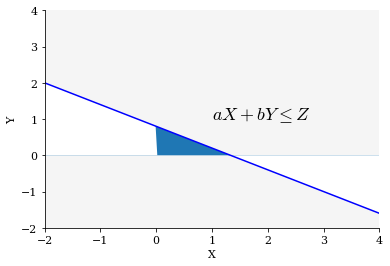

In [18]:
from equadratures import *
import matplotlib.pyplot as plt
import numpy as np

a = 3.0
b = 5.0

def blackbox(x):
    return  a*x[0] + b*x[1]

x  = np.linspace(-2,4,200)
y = -(a/b)*x +4/b # random value 4 to plot the Y intersection
plt.figure(1)
plt.grid()

#ax = plt.subplots()
axes = plt.gca()
axes.set_xlim([-2,4])
axes.set_ylim([-2,4])
plt.plot(x, y , 'b-')
plt.fill_between(x, 0, y )
plt.fill_between(x, 0, y, where= y<0, facecolor = 'white', interpolate=True)
plt.fill_between(x, 0, y, where= x<0, facecolor = 'white' ,interpolate=True)

plt.xlabel('X')
plt.ylabel('Y')
plt.text(1,1,'$aX+bY \leq Z$',fontsize=18)
plt.show()

The limits of integration for $z\geq 0$ are:

- $0 \leq y \leq \frac{z}{b}$

- $0 \leq x \leq \frac{z-bY}{a}$

By sobstituing the distributions expressions into the definition previously written it is possible to calculate the CDF and PDF of $Z$:

$CDF =\normalsize{ \int_{0}^{z/b} \int_{0}^{(z-bY)/a} \lambda_1 e^{-\lambda_1 x} \lambda_2 e^{-\lambda_2 y}} dx dy $ 

$CDF = \large{\frac{a\lambda_2 (e^{-(\lambda_1 z)/a} -1) + \lambda_1 (b-b e^{-(\lambda_2 z)/b})}{b \lambda_1 - a \lambda_2} }$

$PDF = \frac{d}{dZ}(F_{XY}(xy)) = \large{\frac{\lambda_1 \lambda_2}{b \lambda_1 - a \lambda_2}(- e^{(-\lambda_1 z )/a} + e^{-(\lambda_2 z)/b })}$ 


#### Mean and Variance of output distribution

The mean and the variance of the output distribution are defined as follows:

- $E[Z]  = \int_0 ^{\infty} z \cdot f_{Z}(z) dz$
- $ var(Z) = \int_{0}^{\infty} (z- E[Z])^2 \cdot f_{Z}(z) dz$

For the case under study:

- $E[Z] = 11.5$ 

- $var(Z)  = 102.25$

A graphical reppresentation of input an output distribution has been reported together with the Python code used to this aim:

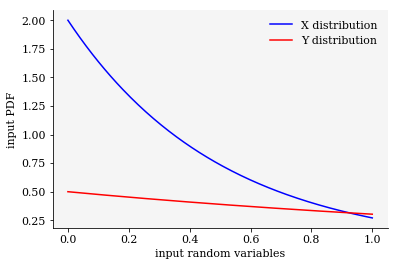

In [19]:
lambda1  =  2.0 # associated with X 
lambda2  =  0.5 # associated with Y

x  = np.linspace(0,1,200)
xi = lambda1*np.exp(-lambda1*x)
yi = lambda2*np.exp(-lambda2*x)

#------------------------------------------------#
#   plot of INPUT distributions

plt.figure()
plt.grid()
plt.plot(x,xi,'b-', label='X distribution')
plt.plot(x,yi,'r-', label='Y distribution')
plt.xlabel('input random variables')
plt.ylabel('input PDF')
plt.legend(loc='upper right')
plt.show()

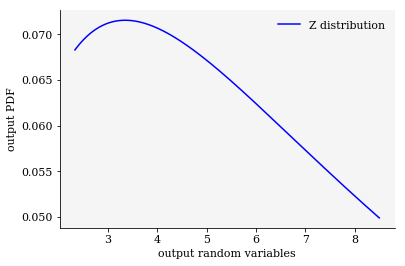

In [20]:
#-------------------------------------------------#
#       plot of OUTPUT distribution

z = blackbox([xi,yi]) # given the input random exp. distributions

def output(z):
    const = (lambda1*lambda2)/(b*lambda1-a*lambda2)
    first = np.exp(-lambda1*z/a)
    second= np.exp(-lambda2*z/b)
    return const*(second - first)
    
    #first = a*lambda2*(np.exp(-lambda1*z/a)-1)
    #second = lambda1*(b-b*np.exp(-lambda2*z/b))
    #third = b*lambda1 - a*lambda2
    #return (first+second)/third

zo = output(z)

plt.figure()
plt.grid()
plt.plot(z,zo,'b-', label='Z distribution')
plt.xlabel('output random variables')
plt.ylabel('output PDF')
plt.legend(loc='upper right')
plt.show()

### Numerical calculation of mean and variance

We want to evaluate the mean and the variance of output distribution numerically: to this aim the Effective Quadrature tools have been used and the related Python code has been reported in the following lines:

In [21]:
from equadratures import *
import matplotlib.pyplot as plt
import numpy as np

xo = Parameter(order=5, distribution='Exponential',shape_parameter_A=lambda1)
yo =  Parameter(order=5, distribution='Exponential',shape_parameter_A=lambda2)


In [22]:
#------------------------------------------------------------#
# effective quadrature

myBasis= Basis('Tensor')
myPoly = Polyint([xo,yo], myBasis)
myPoly.computeCoefficients(blackbox)
myStats = myPoly.getStatistics()
print 'Effective Quadratures'
print 'mean: ', myStats.mean, 'variance:',  myStats.variance


Effective Quadratures
mean:  11.150374765 variance: 85.1823431731


#### Comparison wih Monte Carlo 

The numerical calculation of mean and variance has been done also using Monte Carlo method: the Python code used for this purpose has been reported:

In [23]:
# monte carlo

N = 1500000
B1 = 1/lambda1
B2 = 1/lambda2
xm = np.random.exponential(B1,(N,1))
ym = np.random.exponential(B2,(N,1))

zm = evalfunction(np.reshape([xm,ym],(N,2)),blackbox)

print 'montecarlo:', np.mean(zm), np.var(zm)

montecarlo: 9.99908777469392 108.25110053278452
